### Задание
 - Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
 - Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
 - Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
 - Проанализируйте CTR с разбивкой по рекламной кампании.
 - Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
 - Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
 - Посчитайте конверсию из клика в покупку.

  ***Описание данных***
 - ad_id – идентификатор объявления (рекламы)
 - xyz_campaign_id – идентификатор рекламной кампании в базе компании X
 - fb_campaign_id – идентификатор кампании в Facebook
 - age – возрастная группа, которой показывалась реклама
 - gender – пол тех, кому показывалась реклама
 - interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
 - impressions – число показов
 - clicks – число кликов
 - spent – сумма, которую компания потратила на показ объявления 
 - total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
 - approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [146]:
#Загружаем необходимые библиотеки

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
# Считываем данные из .csv файла

df = pd.read_csv('conversion.csv')

In [3]:
# Проверяем информацию о ДФ

df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


 **Сколько уникальных рекламных кампаний было проведено?**

  **Проверим количество уникальных значений по номинативным и ранговым переменным.**



In [23]:
df['ad_id'].nunique()

1143

In [24]:
df['xyz_campaign_id'].unique()  


array([ 916,  936, 1178], dtype=int64)

**Ответ: 3 рекламные кампании**

In [25]:
df['fb_campaign_id'].nunique()

691

In [26]:
df['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [27]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [28]:
df['interest'].nunique()

40

**Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения.**

In [129]:
# Гурппируем и суммируем

fb_Impressions = df.groupby('fb_campaign_id').agg({'Impressions':'sum'})

In [130]:
# Логарифмируем Impressions

fb_Impressions['Impressions'] = np.log(fb_Impressions['Impressions'])

In [108]:
# Настройка графиков по умолчанию
sns.set(
    font_scale =1.5,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,20)}
)

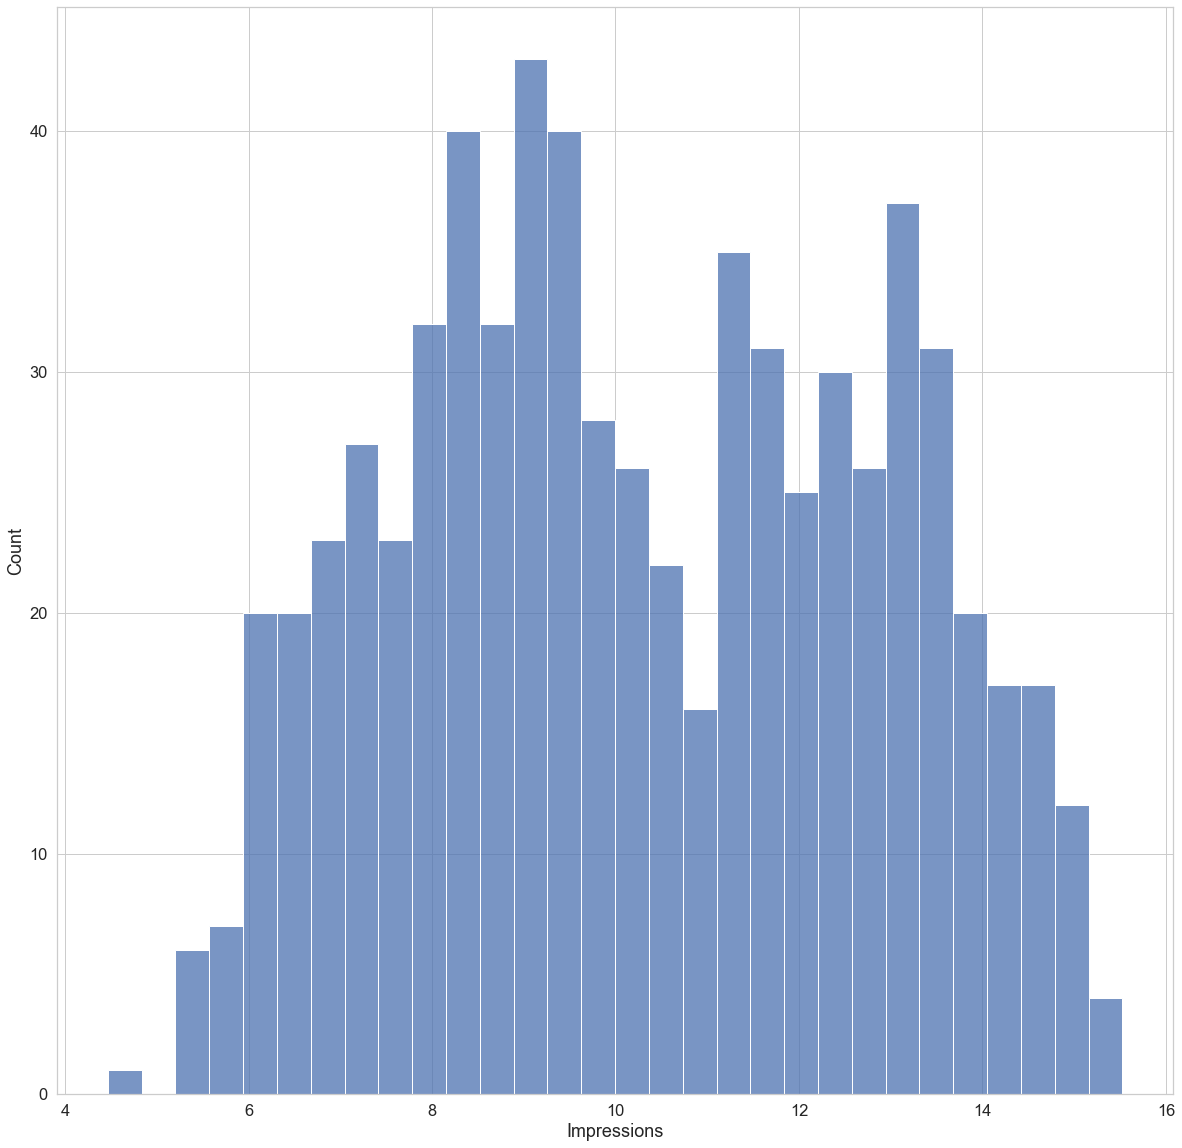

In [135]:
# Строим график

ax = sns.histplot(fb_Impressions['Impressions'], kde = False, bins = 30)

**Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.**

 **Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.**

In [112]:
df['CTR'] = df['Clicks']/df['Impressions']

In [113]:
df['CTR'].describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [119]:
# Способ №1

df[['ad_id','CTR']].sort_values('CTR', ascending=False)

,ad_id,CTR
150,738637,0.001059
440,950224,0.000845
505,951779,0.000610
476,951202,0.000565
448,950537,0.000531
...,...,...
270,777166,0.000000
269,777131,0.000000
268,777130,0.000000
266,776935,0.000000


In [126]:
# Способ №2

df.iloc[df['CTR'].idxmax()]

ad_id                    738637
xyz_campaign_id             936
fb_campaign_id           109857
age                       45-49
gender                        F
interest                     24
Impressions                 944
Clicks                        1
Spent                      1.42
Total_Conversion              1
Approved_Conversion           0
CTR                    0.001059
Name: 150, dtype: object

**Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?**

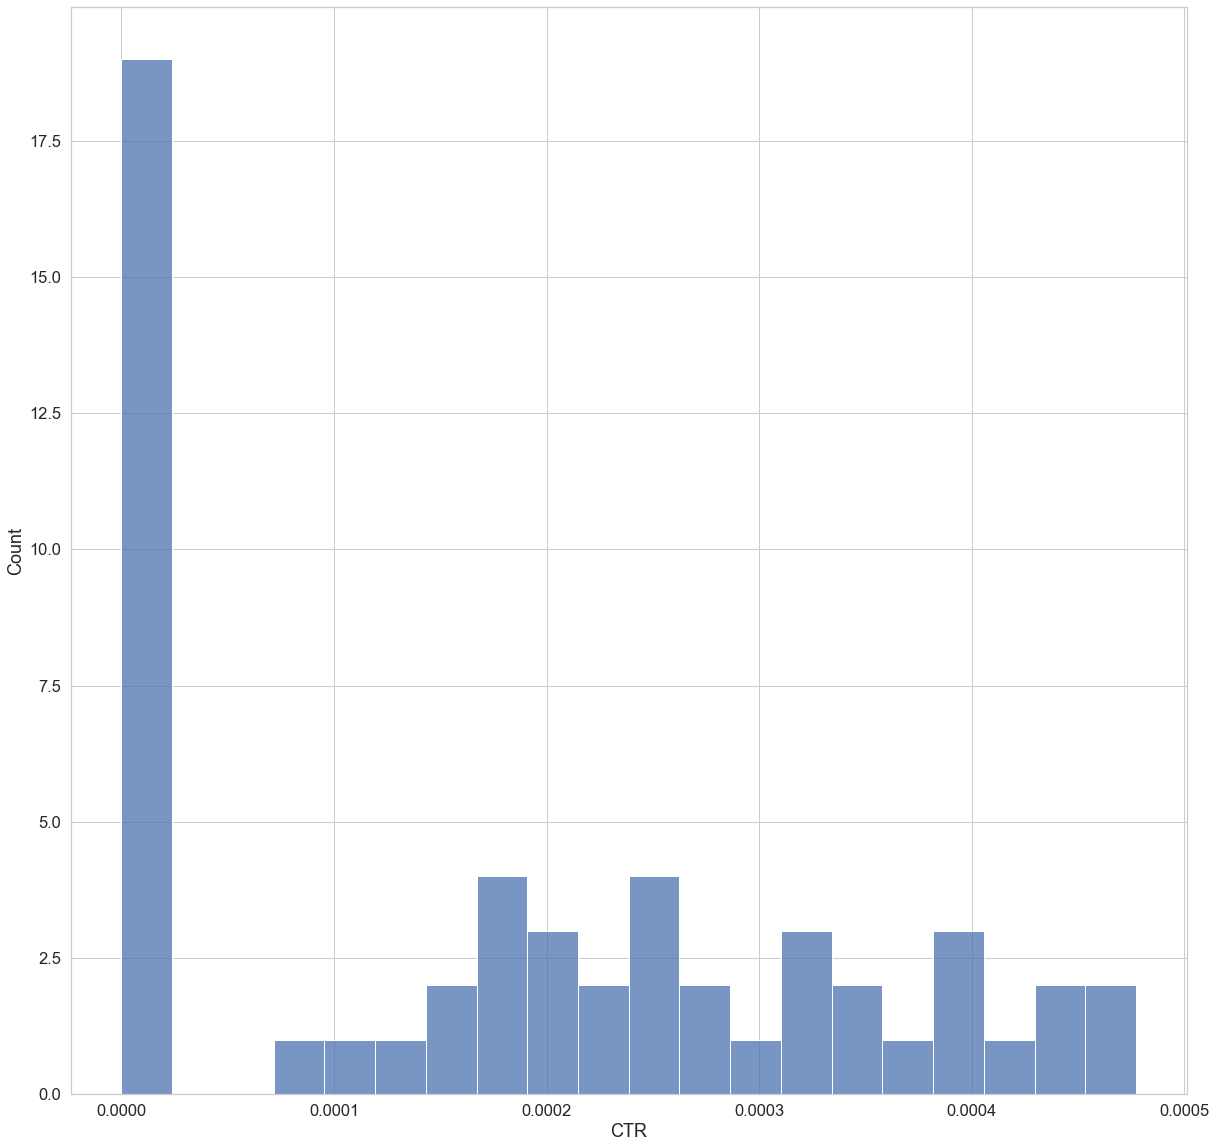

In [138]:
ax = sns.histplot(df.query("xyz_campaign_id == 916").CTR, kde = False, bins = 20)

**CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов**

 **Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.**

 **Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().**

In [139]:
df['CPC'] = df['Spent']/df['Clicks']

In [140]:
df['CPC'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [144]:
# Расчет межквартильного размаха - Способ №1

df['CPC'].quantile(q=0.75) - df['CPC'].quantile(q=0.25)

0.2543636990499998

In [147]:
# Расчет межквартильного размаха - Способ №2

scipy.stats.iqr(df['CPC'], nan_policy='omit')

0.2543636990499998

**Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?**

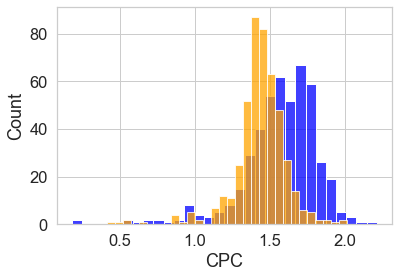

In [157]:
ax = sns.histplot(df.query("gender == 'M'").CPC.dropna(), kde = False, bins = 30, color = 'blue')
ax = sns.histplot(df.query("gender == 'F'").CPC.dropna(), kde = False, bins = 30, color = 'orange')

**Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.**


 **Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.**

In [163]:
df['CR'] = df['Approved_Conversion'].div(df['Clicks']).mul(100).round(2)

In [164]:
df.query('ad_id == 1121814').CR

860    3.09
Name: CR, dtype: float64